# 10-6 精准率和召回率曲线 

学习目标：

+ 从图1中的两根线找到超参数
+ 图2 pr 曲线中找到急剧下降的那个地方
+ 图2 pr 曲线更靠外的模型更好
+ roc曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target < 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)
decision_scores

array([-22.05699094, -33.02941647, -16.2133527 , -80.37915998,
       -48.25123993, -24.540062  , -44.39166416, -25.04295189,
        -0.97827912, -19.71744761, -66.25138015, -51.09603911,
       -31.4934901 , -46.05333022, -38.6787853 , -29.8047152 ,
       -37.58850929, -82.57570731, -37.81903173, -11.0116587 ,
        -9.17439491, -85.13004942, -16.71615781, -46.23728057,
        -5.32994644, -47.91761165, -11.6673027 , -39.19608398,
       -25.25294478, -14.36646951, -16.99784278, -28.91906319,
       -34.3394214 , -29.47609729,  -7.85813241,  -3.82091964,
       -24.08167591, -22.16362066, -33.61223099, -23.14024635,
       -26.91805397, -62.38938965, -38.85693145, -66.77261691,
       -20.14484154, -17.47886686, -18.06800087, -22.22226166,
       -29.62304457, -19.73170557,   1.4955165 ,   8.32081299,
       -36.29313475, -42.5073383 , -25.90458434, -34.98961152,
        -8.42012837, -50.0472571 , -51.48209256,  19.88961219,
        -8.91888657, -31.99344915, -11.66101223,  -0.47

下面画出精准率召回率曲线。

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores > threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

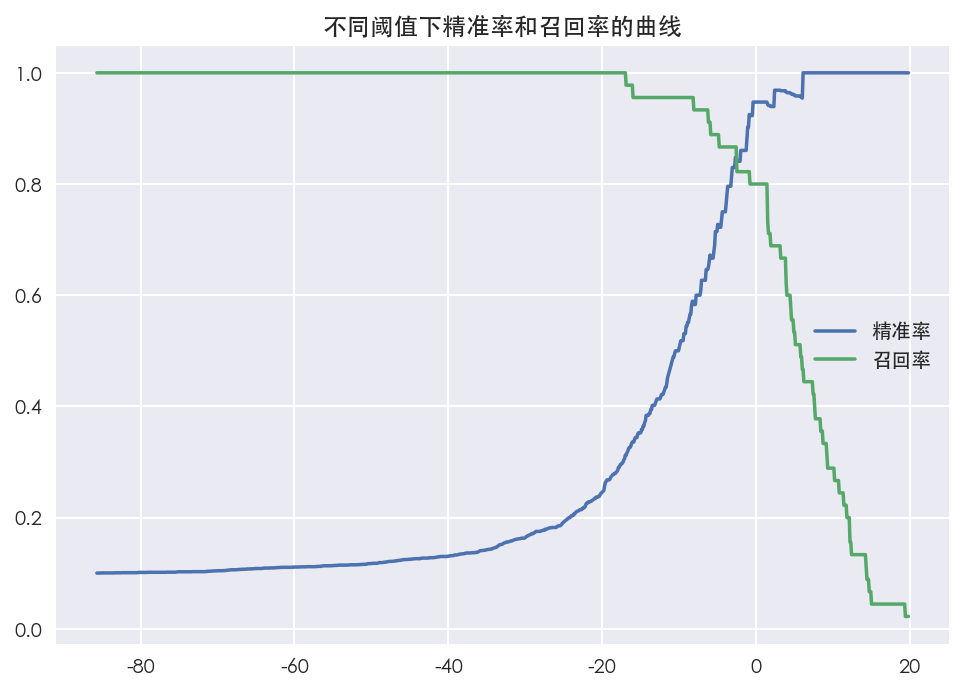

In [6]:
plt.plot(thresholds, precisions, label='精准率')
plt.plot(thresholds, recalls, label='召回率')
plt.legend(loc='best')
plt.title('不同阈值下精准率和召回率的曲线')
plt.show()

## 精准度-召回率（Precision-Recall）曲线

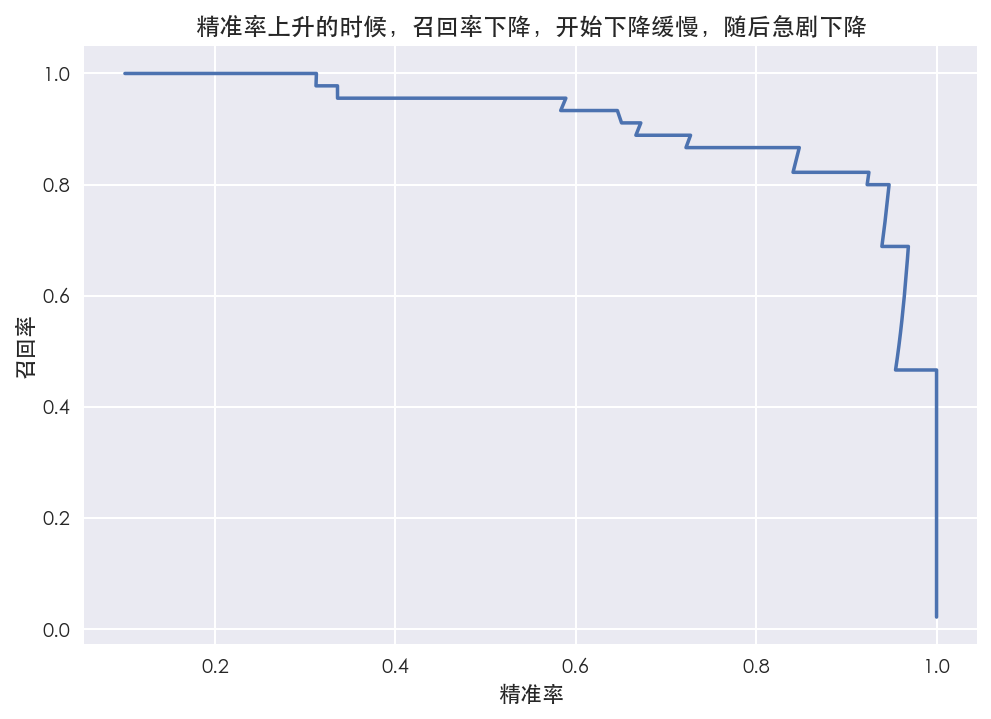

In [7]:
plt.plot(precisions, recalls)
plt.xlabel('精准率')
plt.ylabel('召回率')
plt.title('精准率上升的时候，召回率下降，开始下降缓慢，随后急剧下降')
plt.show()

## scikit-learn 中的 Precision-Recall 曲线

注意：precision_recall_curve 的第 2 个参数是 decision_scores。

In [8]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_test, decision_scores)

In [9]:
precisions.shape, recalls.shape, thresholds.shape

((145,), (145,), (144,))

+ thresholds 的 shape 比 precisions 和 recalls 少 1，原因可以看官网。

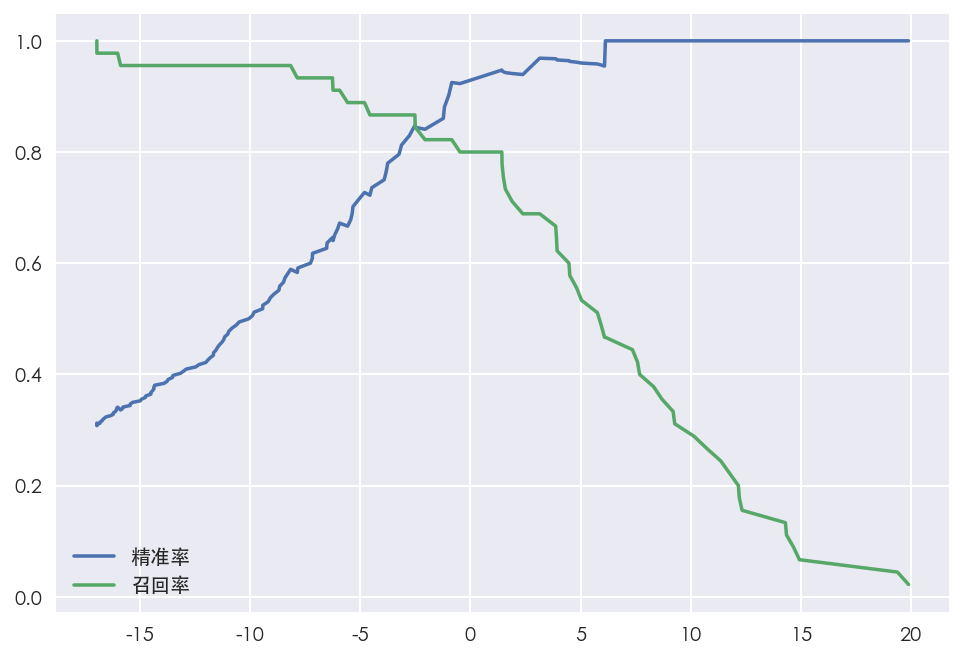

In [10]:
plt.plot(thresholds, precisions[:-1], label='精准率')
plt.plot(thresholds, recalls[:-1], label='召回率')
plt.legend()
plt.show()

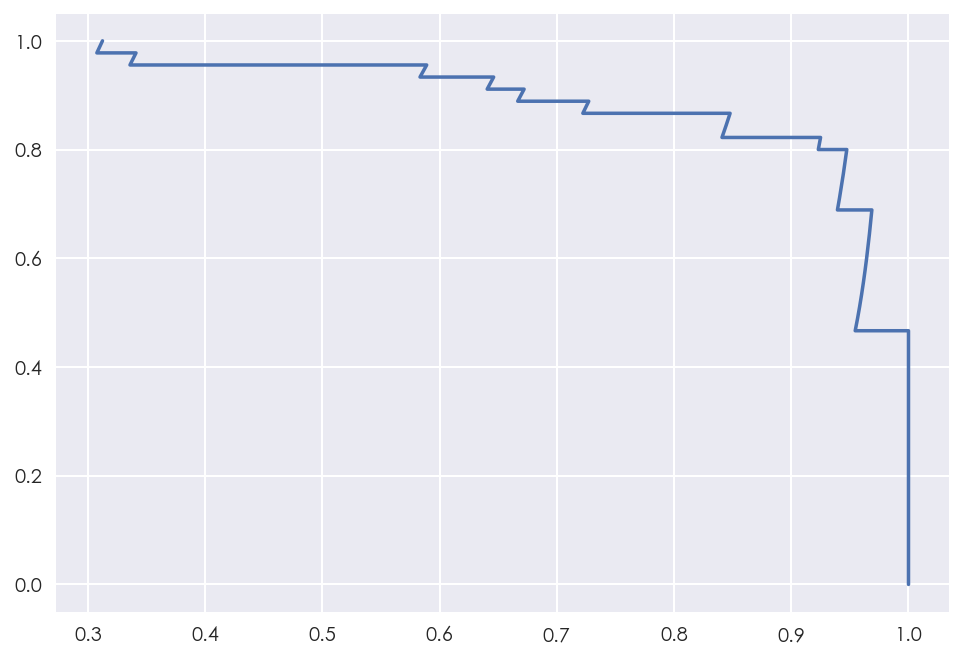

In [11]:
plt.plot(precisions, recalls)
plt.show()

混淆矩阵：

|       | 预测值：0 | 预测值：1 |
| :---: | :---: | :---: |
| 真实值：0 |  TN   |  FP   |
| 真实值：1 |  FN   |  TP   |

结论：精准率上升的时候，召回率就下降。从混淆矩阵中也不难理解这个规律。FP 越来越少的时候，精准率就上升了，此时 FN 就增加了，召回率就降低。

如何理解 FP 越来越少，即错误预测关注的比例越来越少，这正是之前所说的阈值提高的过程。